# 

## Import statements

In [120]:
import pandas as pd
from astropy.units import Quantity
import matplotlib.pyplot as plt
import numpy as np

from common import xcs3p_colour, xcs_cosmo
from xga.samples import ClusterSample
from xga.imagetools.misc import physical_rad_to_pix

## 

In [6]:
chosen_names = ['SDSSXCS-134', 'SDSSXCS-6955']

In [94]:
xcs3p = pd.read_csv("../sample_files/xcs3p_sdssrm_vol_lim_temperr_25%_clusters.csv")
xcs3p_r2500 = pd.read_csv("../sample_files/xcs3p_sdssrm_r2500_props_nonvol_lim_temperr_100%_clusters.csv")
example_clusters = xcs3p[xcs3p['name'].isin(chosen_names)]
example_clusters = example_clusters.join(xcs3p_r2500, rsuffix='r2500')
example_clusters

,name,MEM_MATCH_ID,xapa_ra,xapa_dec,z,r500,Tx,Tx-,Tx+,Lx52,...,Tx+r2500,Lx52r2500,Lx52-r2500,Lx52+r2500,Lxr2500,Lx-r2500,Lx+r2500,richnessr2500,richness_errr2500,XCS_NAMEr2500
4,SDSSXCS-134,134,4.90839,3.609818,0.277304,4.441778,6.52537,0.104618,0.104746,4.531085,...,0.106573,0.599510,0.005920,0.005900,1.856514,0.029981,0.028809,56.996796,3.219202,XMMXCS J001737.5-005234.2
30,SDSSXCS-6955,6955,36.45483,-5.894148,0.222771,3.108955,2.41024,0.299063,0.392930,0.209242,...,0.029345,3.631483,0.017078,0.016109,9.755187,0.059563,0.051672,31.444715,3.023459,XMMXCS J010649.3+010324.7


In [95]:
# Reading out the relevant values into arrays just for ease of passing into the ClusterSample object
ra = example_clusters['xapa_ra'].values
dec = example_clusters['xapa_dec'].values
z = example_clusters['z'].values
# Not using the IAU names in XCS_NAME column, its easier for me to use the name based on redMaPPer ID
n = example_clusters['name'].values
# In arcminutes, ClusterSample declaration will convert to kpc using the provided cosmology
r500 = Quantity(example_clusters['r500'].values, 'arcmin')
r2500 = Quantity(example_clusters['r2500'].values, 'arcmin')
# Not likely to use richness in this notebook, but I'm putting it in the sample object anyway
r = example_clusters['richness'].values
r_err = example_clusters['richness_err'].values

# Declaring the actual ClusterSample instance for the XCS sample
examp_srcs = ClusterSample(ra, dec, z, n, r500=r500, r2500=r2500, richness=r, richness_err=r_err, 
                           cosmology=xcs_cosmo, load_fits=True, use_peak=False, clean_obs=True, 
                           clean_obs_reg='r500', clean_obs_threshold=0.7)

Setting up Galaxy Clusters: 100%|███████████████████████████████████████████████| 2/2 [00:05<00:00,  2.64s/it]
/mnt/pact/dt237/code/PycharmProjects/XGA/xga/samples/extended.py:237: UserWarning: Non-fatal warnings occurred during the declaration of some sources, to access them please use the suppressed_warnings property of this sample.
  self._check_source_warnings()


In [96]:
examp_srcs.info()


-----------------------------------------------------
Number of Sources - 2
Redshift Information - True
Sources with ≥1 detection - 2 [100%]
-----------------------------------------------------



In [99]:
print(examp_srcs.names)
print(examp_srcs.r500)
print(examp_srcs.r2500)

['SDSSXCS-134' 'SDSSXCS-6955']
[1123.32073626  668.99367644] kpc
[483.14380017 293.85736675] kpc


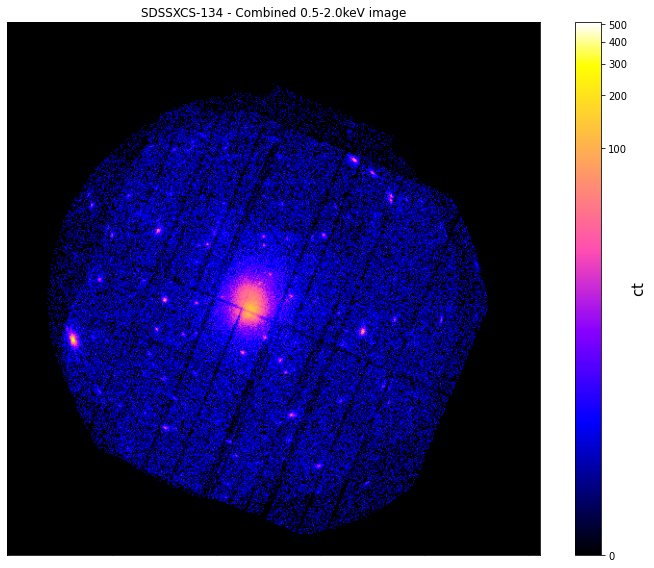


-----------------------------------------------------
Source Name - SDSSXCS-134
User Coordinates - (4.9083898, 3.6098177) degrees
X-ray Peak - (4.9083898, 3.6098177) degrees
nH - 0.0272 1e+22 / cm2
Redshift - 0.277
XMM ObsIDs - 1
PN Observations - 1
MOS1 Observations - 1
MOS2 Observations - 1
On-Axis - 1
With regions - 1
Total regions - 85
Obs with 1 detection - 1
Obs with >1 matches - 0
Images associated - 9
Exposure maps associated - 6
Combined Ratemaps associated - 2
Spectra associated - 12
Fitted Models - constant*tbabs*apec | constant*tbabs*apec | constant*tbabs*apec
R500 - 1123.320736258806 kpc
R500 SNR - 227.06
Richness - 108.60438±4.7924843
R500 Tx - 6.73±0.12[keV]
R500 0.5-2.0keV Lx - 4.81±0.03[e+44 erg/s]
-----------------------------------------------------



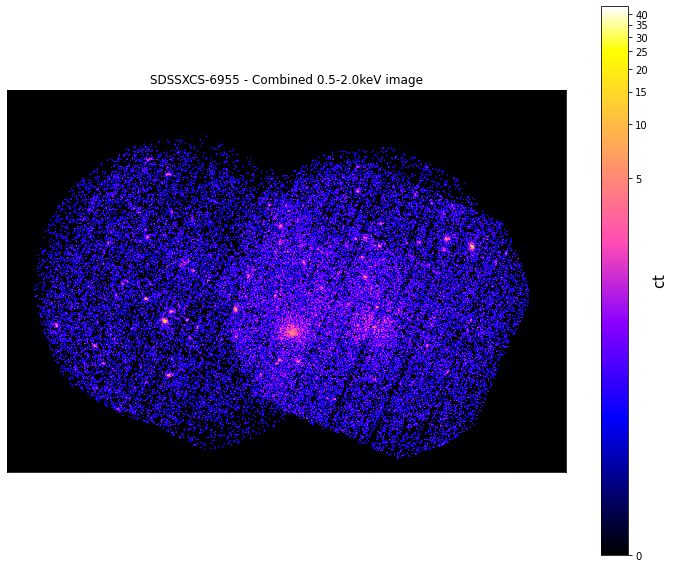


-----------------------------------------------------
Source Name - SDSSXCS-6955
User Coordinates - (36.45483, -5.894147599999998) degrees
X-ray Peak - (36.45483, -5.894147599999998) degrees
nH - 0.0249 1e+22 / cm2
Redshift - 0.223
XMM ObsIDs - 2
PN Observations - 2
MOS1 Observations - 2
MOS2 Observations - 2
On-Axis - 0
With regions - 2
Total regions - 61
Obs with 1 detection - 2
Obs with >1 matches - 0
Images associated - 18
Exposure maps associated - 12
Combined Ratemaps associated - 2
Spectra associated - 24
Fitted Models - constant*tbabs*apec | constant*tbabs*apec | constant*tbabs*apec
R500 - 668.9936764375799 kpc
R500 SNR - 41.3
Richness - 32.131187±2.8320866
R500 Tx - 2.18±0.305[keV]
R500 0.5-2.0keV Lx - 0.25±0.025[e+44 erg/s]
-----------------------------------------------------



In [18]:
for src in examp_srcs:
    src.get_combined_images().view()
    src.info()

In [54]:
examp_srcs[1].disassociated_obs

{'0404965301': ['pn', 'mos1', 'mos2'],
 '0404969201': ['pn', 'mos1', 'mos2'],
 '0404964901': ['pn', 'mos1', 'mos2'],
 '0553910401': ['pn', 'mos1', 'mos2']}

In [58]:
examp_srcs[1].matched_regions

{'0677600131': <EllipseSkyRegion(<SkyCoord (ICRS): (ra, dec) in deg
     (36.45719413, -5.8935039)>, width=0.04033076685274979 deg, height=0.036413375260336514 deg, angle=12.136122089608449 deg)>,
 '0404965201': <EllipseSkyRegion(<SkyCoord (ICRS): (ra, dec) in deg
     (36.45482991, -5.89414766)>, width=0.04467862927526675 deg, height=0.035625598999729544 deg, angle=-3.9225726364003193 deg)>}

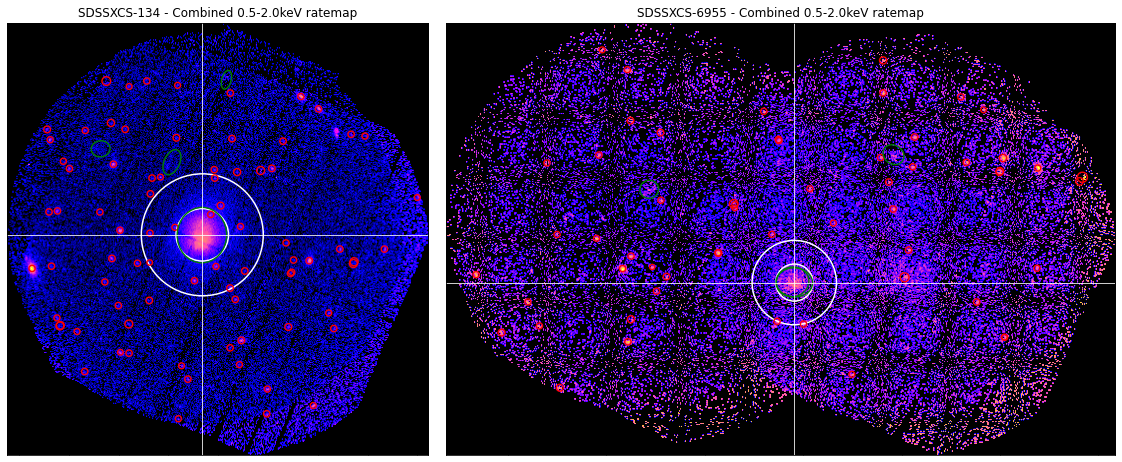

In [106]:
fig_size = (15.5, 6)
fig = plt.figure(figsize=fig_size)

rt_one = examp_srcs[0].get_combined_ratemaps()
src_one_all_reg = {o: r + [examp_srcs[0].matched_regions[o]] 
                   for o, r in examp_srcs[0].get_interloper_regions().items()}
rt_one.regions = src_one_all_reg

rt_two = examp_srcs[1].get_combined_ratemaps()
src_two_all_reg = {o: r + [examp_srcs[1].matched_regions[o]] 
                   for o, r in examp_srcs[1].get_interloper_regions().items()}

rt_two.regions = src_two_all_reg

plt_buff = 1
tot_x = rt_one.shape[1] + rt_two.shape[1] + plt_buff

src_one_r500 = physical_rad_to_pix(rt_one, examp_srcs[0].r500, examp_srcs[0].ra_dec, examp_srcs[0].redshift, 
                                   xcs_cosmo).value
src_one_r2500 = physical_rad_to_pix(rt_one, examp_srcs[0].r2500, examp_srcs[0].ra_dec, examp_srcs[0].redshift, 
                                    xcs_cosmo).value
src_two_r500 = physical_rad_to_pix(rt_two, examp_srcs[1].r500, examp_srcs[1].ra_dec, examp_srcs[1].redshift, 
                                   xcs_cosmo).value
src_two_r2500 = physical_rad_to_pix(rt_two, examp_srcs[1].r2500, examp_srcs[1].ra_dec, examp_srcs[1].redshift, 
                                    xcs_cosmo).value

rt_one_ax = fig.add_axes((0, 0, rt_one.shape[1]/tot_x, 1))
rt_one.get_view(rt_one_ax, examp_srcs[0].ra_dec, zoom_in=True, view_regions=True, 
                radial_bins_pix=[src_one_r2500, src_one_r500])

bodge_x = -5
rt_two_ax = fig.add_axes(((rt_one.shape[1] + plt_buff - bodge_x)/tot_x, 0, rt_two.shape[1]/tot_x, 1))
rt_two.get_view(rt_two_ax, examp_srcs[1].ra_dec, zoom_in=True, view_regions=True, 
                radial_bins_pix=[src_two_r2500, src_two_r500])

plt.savefig('../outputs/figures/demo_clusters_RT.pdf', bbox_inches='tight')
plt.show()

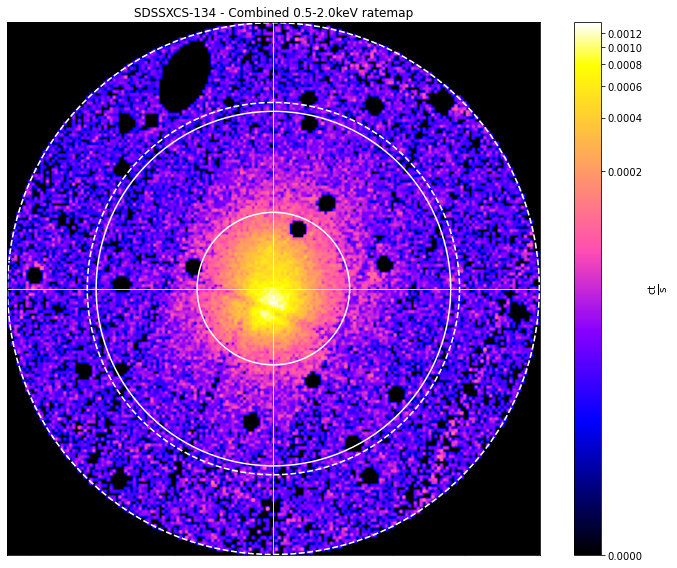

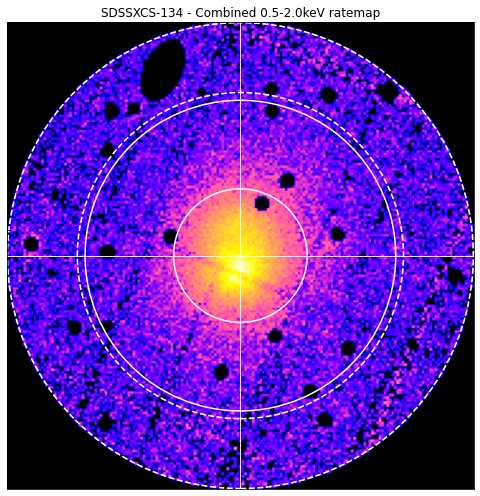

In [125]:
# rt_one.view(examp_srcs[0].ra_dec, examp_srcs[0].get_mask('r500')[0], zoom_in=True)
rt_one.view(examp_srcs[0].ra_dec, examp_srcs[0].get_custom_mask(examp_srcs[0].r500*1.5), zoom_in=True, 
            radial_bins_pix=[src_one_r2500, src_one_r500], back_bin_pix=src_one_r500*np.array([1.05, 1.5]))

plt.figure(figsize=(7, 7))
rt_one.get_view(plt.gca(), Quantity([examp_srcs[0].peak, examp_srcs[0].ra_dec]), 
                 examp_srcs[0].get_custom_mask(examp_srcs[0].r500*1.5), zoom_in=True, 
                 radial_bins_pix=[src_one_r2500, src_one_r500], back_bin_pix=src_one_r500*np.array([1.05, 1.5]))
plt.tight_layout()
plt.savefig("../outputs/figures/demo_cluster_mask.pdf")
plt.show()